In [ ]:
from google.colab import files
data = files.upload()

Saving petals_sepals.csv to petals_sepals.csv


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('petals_sepals.csv')

fig01 = px.scatter(df, x = 'petal_size', y = 'sepal_size')
fig01.show()

To determine the correct value of K, we use wcss(within clusters sum of squares) parimeter

In [ ]:
from sklearn.cluster import KMeans
wcss = []
x = df.iloc[:, [0, 1]].values
print(x)

[[11.32348369 13.86616131]
 [ 9.26584161 13.4434136 ]
 [14.32994392  7.95619956]
 [11.88390198  7.65853411]
 [ 9.95772216 12.27353488]
 [11.87446585 13.23783855]
 [11.05434664  8.34645832]
 [ 9.92501036  9.63140484]
 [ 6.72330556 12.91052608]
 [ 1.7547028   4.92229755]
 [ 2.53760792  2.39274409]
 [ 0.82826409  2.57057886]
 [14.17308088  9.03309242]
 [ 2.8166071   2.21911623]
 [ 8.6152154  12.96116714]
 [12.87654335  8.38760135]
 [14.08781072  6.68177744]
 [ 2.59059319  2.04203334]
 [ 3.32057276  4.34097779]
 [ 3.32553533  2.20737103]
 [10.01773429  9.49527624]
 [ 9.20235232 13.7895536 ]
 [10.47443458 13.03790983]
 [11.45457896  8.76001507]
 [11.03565171  9.70704578]
 [13.46897961  8.43272357]
 [14.40798387  8.68145304]
 [11.49414942 12.35569869]
 [11.88685783  8.13176978]
 [ 8.54247125 13.30436616]
 [13.86822339  9.45088543]
 [10.49468563 12.56398709]
 [10.16523291 13.23462868]
 [12.32039217  9.30666119]
 [ 0.958256    4.44098269]
 [ 9.26893891 13.97415349]
 [ 0.61360663  2.76290393]
 

In [ ]:
for i in range (1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

print(wcss)

[5446.649985340712, 1276.1239239406564, 431.97630172772193, 325.1952958155419, 219.4073494469312, 182.3600089173876, 161.60787845218613, 138.86696343888602, 119.51096808110992, 102.08123579340246]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



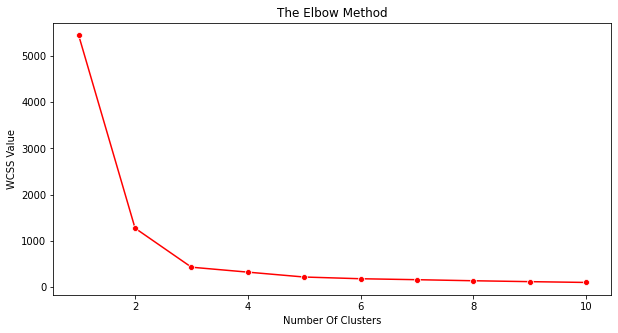

In [ ]:
import matplotlib.pyplot as plt
import seaborn

plt.figure(figsize = (10, 5))
seaborn.lineplot(range(1, 11), wcss, color = 'red', marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS Value')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(kmeans.cluster_centers_)

[[ 8.8567016  12.83136004]
 [ 2.00809489  3.4694147 ]
 [12.47069684  8.27960708]]


In [ ]:
plt.figure(figsize = (15, 7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

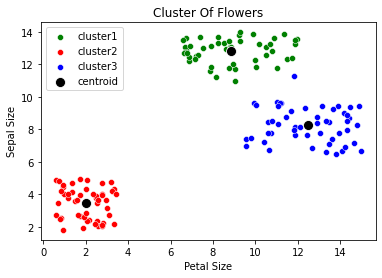

In [ ]:
seaborn.scatterplot(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], color = 'green', label = 'cluster1')
seaborn.scatterplot(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], color = 'red', label = 'cluster2')
seaborn.scatterplot(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], color = 'blue', label = 'cluster3')
seaborn.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', label = 'centroid', s = 100)
plt.grid(False)
plt.title('Cluster Of Flowers')
plt.xlabel('Petal Size')
plt.ylabel('Sepal Size')
plt.show()